## Introduction: Credit Risk Analysis
Analyze the loan applications for Credit risk based on the certain criteria. In the financial world today, its important for banks and financial institutuions to evalaute the customer/client ability to repay the loans/credits. The goal is to address the complexities of credit risk assessment and offer actionable insights for mitigating potential defaults.

## Dataset Description

This dataset provides essential information about loan applicants and their characteristics. The task is to develop predictive models to determine the likelihood of loan default based on these simplified features.

. ID: Unique identifier for each loan applicant.. AAge: Age of the loan applicant. . 
Income: Income of the loan applicant.. 
Home: Home ownership status (Own, Mortgage, Rent.). .
Emp_Length: Employment length in yea. r. s.
Intent: Purpose of the loan (e.g., education, home improveme. n. t).
Amount: Loan amount applied.  . for.
Rate: Interest rate on the.  . loan.
Status: Loan approval status (Fully Paid, Charged Off, Cu. r. rent).
Percent_Income: Loan amount as a percentage of.  . income.
Default: Whether the applicant has defaulted on a loan previously (. Y. es, No).
Cred_Length: Length of the applicant's credit history.

## Import Libraries

In [2]:

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, SpectralClustering

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam


from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler


import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

## Data Exploration

Reading the dataset with pandas library

In [3]:
data = pd.read_csv("credit_risk.csv")
data.head() #reading the first five records of the dataframe

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [4]:
# This gives the dimensions of the dataframe.
data.shape

(32581, 12)

In [5]:
# It provides a summary that includes measures of central tendency, dispersion, and various percentiles.
data.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
# This gives the information about the data types and non-null values of the variables in the dataframe.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


We understand by observing the above information that dataframe contains some null values in Emp_length and Rate.

In [7]:
data.isnull().sum()

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

In [8]:
#Replacing Nan values with mean
data["Emp_length"] = data["Emp_length"].fillna(data["Emp_length"].median())
data["Rate"] = data["Rate"].fillna(data["Rate"].median())


Here, we are handling the missing values (NaN) in the columns "Emp_length" and "Rate" by replacing them with the median.

In [9]:
data.isnull().sum()

Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64

In [10]:
#number of unique values per column
data.nunique()

Id                32581
Age                  58
Income             4295
Home                  4
Emp_length           36
Intent                6
Amount              753
Rate                348
Status                2
Percent_income       77
Default               2
Cred_length          29
dtype: int64

In [11]:
# Check duplicate data
print("Number of duplicates: " + str(data.duplicated().sum()))

Number of duplicates: 0


In [12]:
# Dropping ALL duplicate values
data.drop_duplicates(keep=False,inplace=True)

In [13]:
# Check the unique values and frequency for 'Status'
data['Status'].value_counts()

Status
0    25473
1     7108
Name: count, dtype: int64

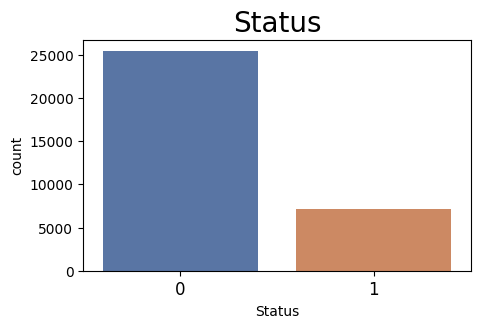

In [14]:
# Status - Target Feature

fig, ax = plt.subplots(figsize=(5, 3))
sns.countplot(x=data["Status"], palette="deep")
plt.title('Status', fontsize = 20)
plt.xticks(fontsize = 12)
plt.show()

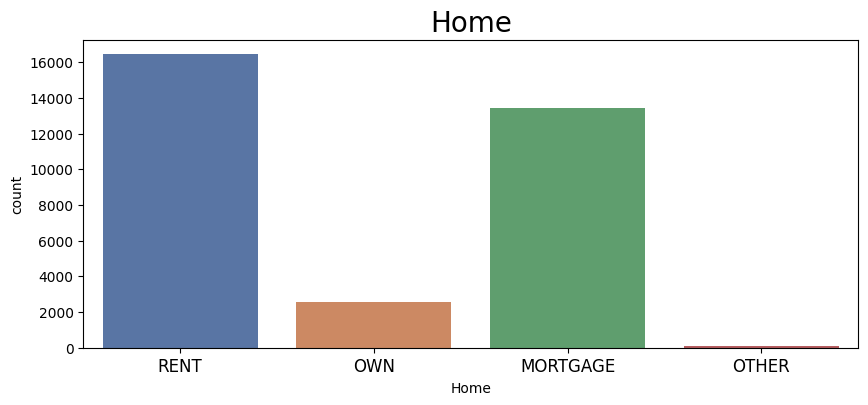

In [15]:
#Home

fig, ax = plt.subplots(figsize=(10, 4))
sns.countplot(x=data["Home"], palette="deep")
plt.title('Home', fontsize = 20)
plt.xticks(fontsize = 12)
plt.show()

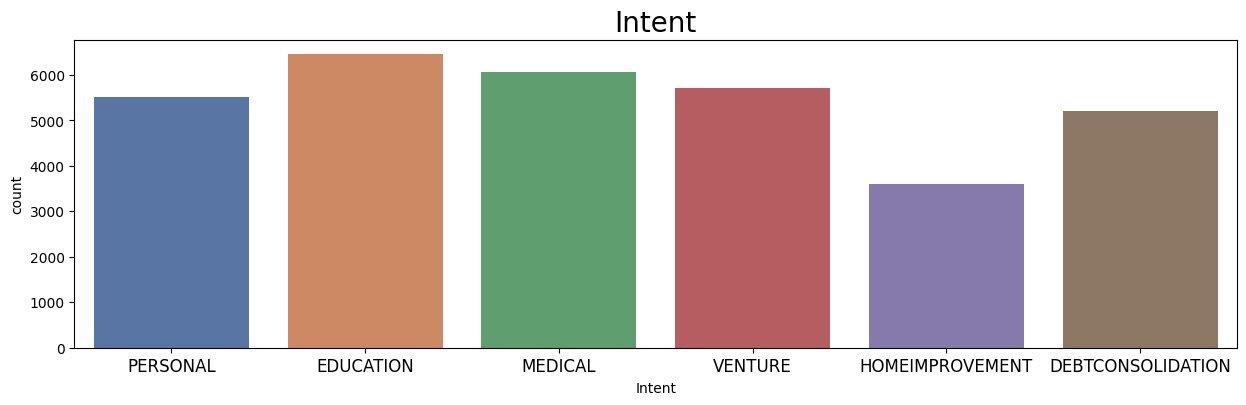

In [16]:
#Intent

fig, ax = plt.subplots(figsize=(15, 4))
sns.countplot(x=data["Intent"], palette="deep")
plt.title('Intent', fontsize = 20)
plt.xticks(fontsize = 12)
plt.show()

In [17]:
#Drop 'Id' column (Its not providing any useful insight in our predictions so dropping it in the process of data cleaning/transformation)
data.drop(columns=["Id"],axis=1, inplace = True)

In [18]:
data.head()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


#### Label Encoder

It is used to replace categorical variables data to pass through machine learning models as a numerical input. Here, we have 3 categorical columns in our dataframe.

. Home

. Intent

. Default

In [19]:
# Instantiate encoder
lb = LabelEncoder()

# Identify object-type columns
objList = data.select_dtypes(include="object").columns

# Iterate through each object-type column and apply label encoding
for obj in objList:
    data[obj] = lb.fit_transform(data[obj].astype(str))


In [20]:
# Reading the dataframe again to check the data conversion.
data.head()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,22,59000,3,123.0,4,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,35000,14.27,1,0.55,1,4


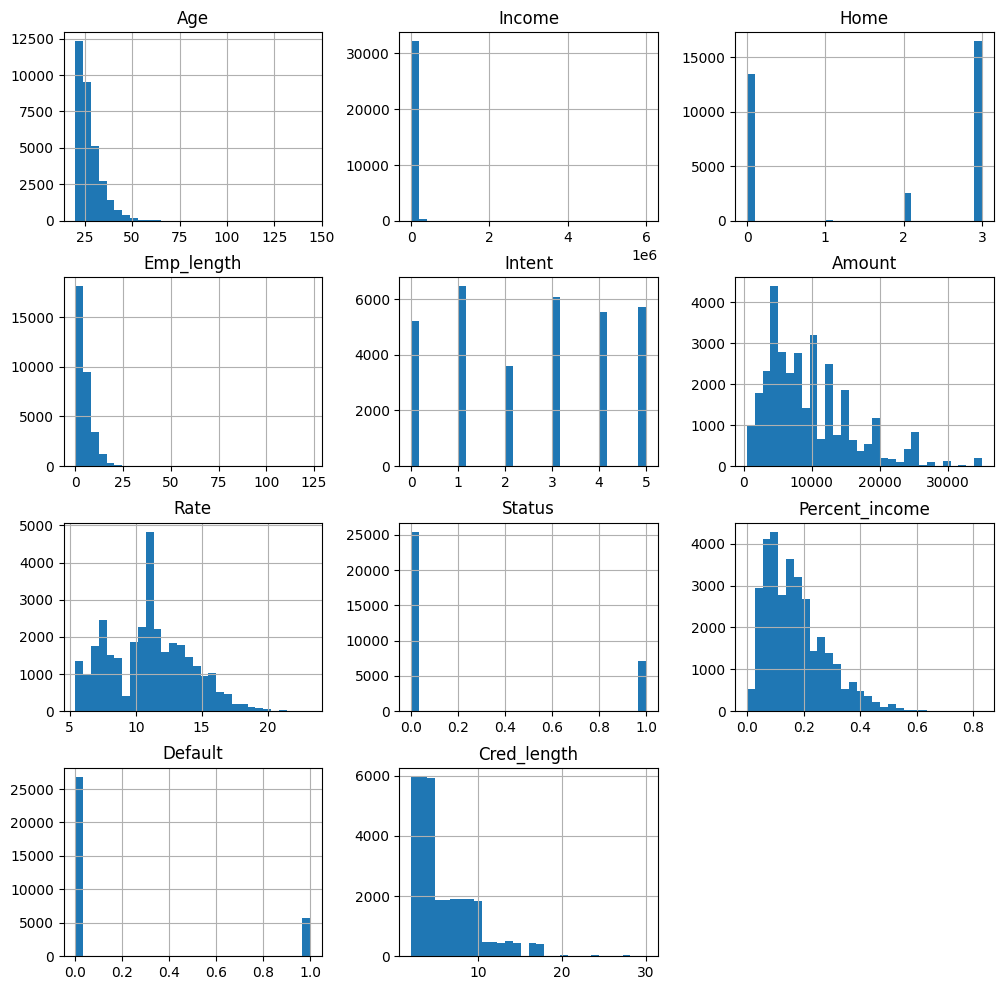

In [21]:
#Histogram
data.hist(figsize=(12,12), bins=30)
plt.show()

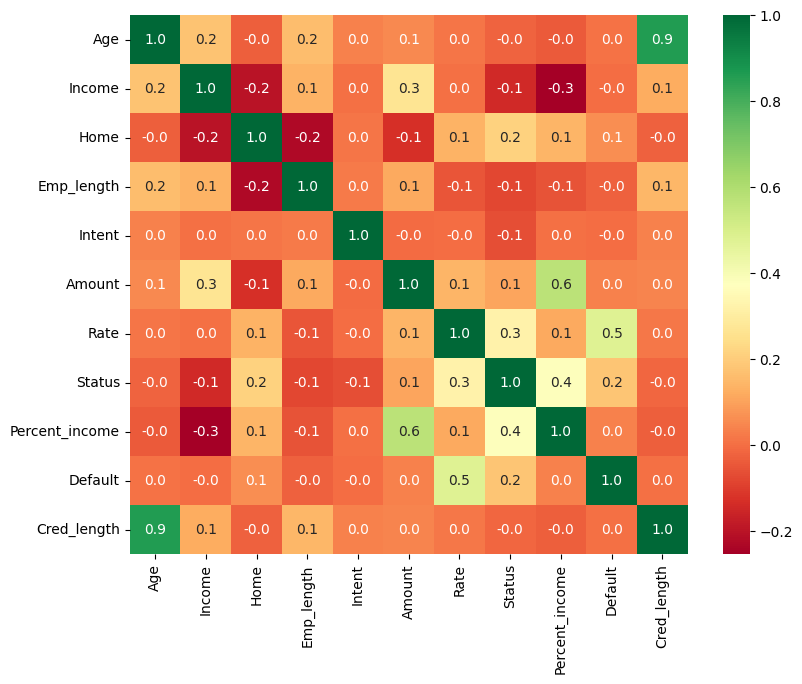

In [22]:
#correlation heatmap (To understand the linear relationship between variables)
correlation_matrix = data.corr()
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', fmt=".1f", ax=ax)
plt.show()

Let's check the correlation of all the input variables with our target variable 'Status'

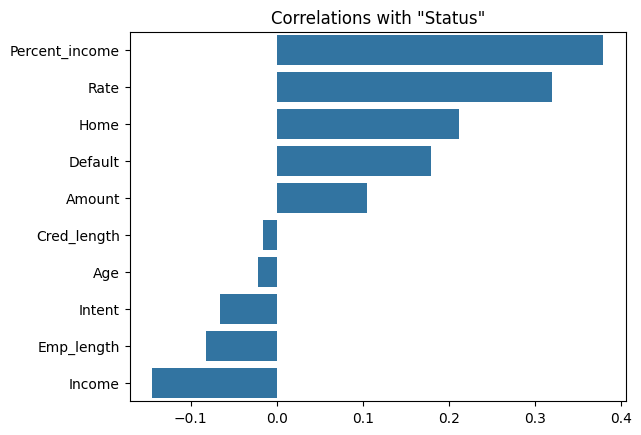

In [23]:
# Correlations with "Status"

# Set correlation limit
limit = -1.0

# Calculate correlations with "Status" and sort them in descending order
datas = data.corr()["Status"].sort_values(ascending=False)
indices = datas.index
labels = []
corr = []
for i in range(1, len(indices)):
    if datas[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(datas[i])
sns.barplot(x=corr, y=labels)
plt.title('Correlations with "Status"')
plt.show()

### Scatterplots

Helps to identify the distribution, correlation between to variables and to detect anomolies

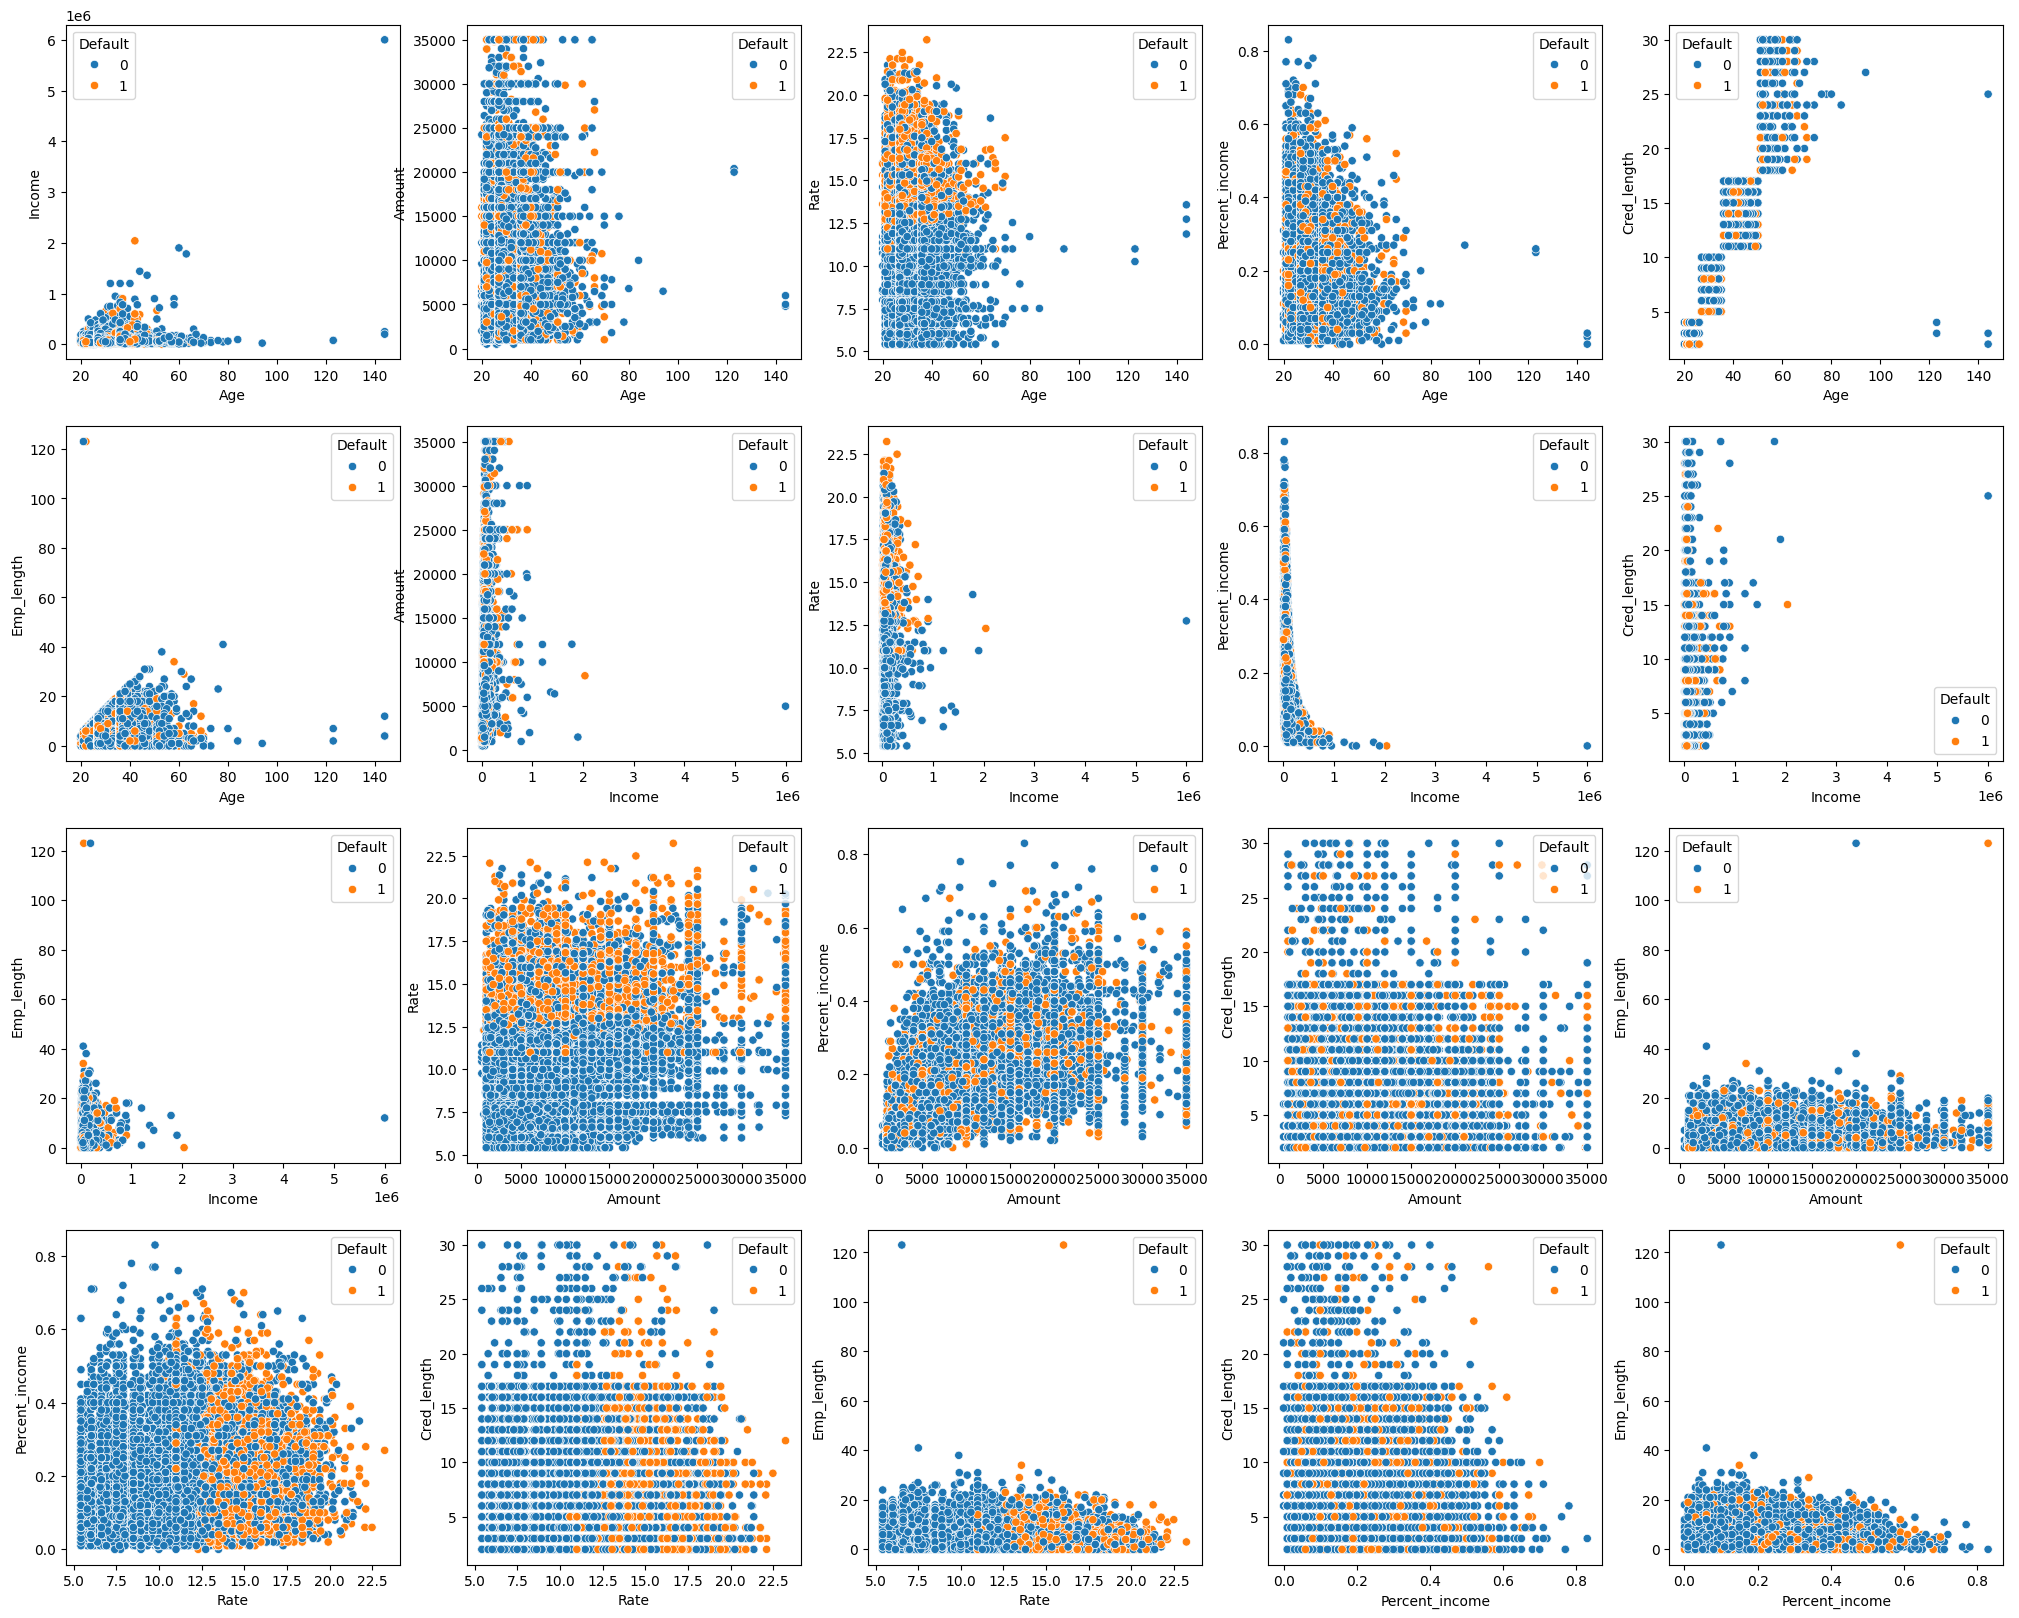

In [24]:
fig, axes = plt.subplots(4, 5, figsize = (25, 20))

sns.scatterplot(ax = axes[0,0], x = 'Age', y = 'Income', data = data, hue = 'Default')
sns.scatterplot(ax = axes[0,1], x = 'Age', y = 'Amount', data = data, hue = 'Default')
sns.scatterplot(ax = axes[0,2], x = 'Age', y = 'Rate', data = data, hue = 'Default')
sns.scatterplot(ax = axes[0,3], x = 'Age', y = 'Percent_income', data = data, hue = 'Default')
sns.scatterplot(ax = axes[0,4], x = 'Age', y = 'Cred_length', data = data, hue = 'Default')
sns.scatterplot(ax = axes[1,0], x = 'Age', y = 'Emp_length', data = data, hue = 'Default')
sns.scatterplot(ax = axes[1,1], x = 'Income', y = 'Amount', data = data, hue = 'Default')
sns.scatterplot(ax = axes[1,2], x = 'Income', y = 'Rate', data = data, hue = 'Default')
sns.scatterplot(ax = axes[1,3], x = 'Income', y = 'Percent_income', data = data, hue = 'Default')
sns.scatterplot(ax = axes[1,4], x = 'Income', y = 'Cred_length', data = data, hue = 'Default')
sns.scatterplot(ax = axes[2,0], x = 'Income', y = 'Emp_length', data = data, hue = 'Default')
sns.scatterplot(ax = axes[2,1], x = 'Amount', y = 'Rate', data = data, hue = 'Default')
sns.scatterplot(ax = axes[2,2], x = 'Amount', y = 'Percent_income', data = data, hue = 'Default')
sns.scatterplot(ax = axes[2,3], x = 'Amount', y = 'Cred_length', data = data, hue = 'Default')
sns.scatterplot(ax = axes[2,4], x = 'Amount', y = 'Emp_length', data = data, hue = 'Default')
sns.scatterplot(ax = axes[3,0], x = 'Rate', y = 'Percent_income', data = data, hue = 'Default')
sns.scatterplot(ax = axes[3,1], x = 'Rate', y = 'Cred_length', data = data, hue = 'Default')
sns.scatterplot(ax = axes[3,2], x = 'Rate', y = 'Emp_length', data = data, hue = 'Default')
sns.scatterplot(ax = axes[3,3], x = 'Percent_income', y = 'Cred_length', data = data, hue = 'Default')
sns.scatterplot(ax = axes[3,4], x = 'Percent_income', y = 'Emp_length', data = data, hue = 'Default')
plt.show()

From the scatterplots, we can clearly observe that 'Age' and 'Emp_length' columns have the outliers, which can impact the predictions.


In [25]:
data[data['Age'] >= 100]

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
81,144,250000,3,4.0,5,4800,13.57,0,0.02,0,3
183,144,200000,0,4.0,1,6000,11.86,0,0.03,0,2
575,123,80004,3,2.0,1,20400,10.25,0,0.25,0,3
747,123,78000,3,7.0,5,20000,10.99,0,0.26,0,4
32297,144,6000000,0,12.0,4,5000,12.73,0,0.00,0,25


In [26]:
data[data['Emp_length'] >= 120]

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,22,59000,3,123.0,4,35000,16.02,1,0.59,1,3
210,21,192000,0,123.0,5,20000,6.54,0,0.10,0,4


As we can clearly observe the outliers in the above two columns, we are imputing them with the median values.

In [27]:
data['Emp_length'] = data['Emp_length'].replace(123.0, data['Emp_length'].median())
data['Age'] = data['Age'].replace([144, 123], data['Age'].median())

In [28]:
data.head()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,22,59000,3,4.0,4,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,35000,14.27,1,0.55,1,4


### Data Preprocessing and Train-Test Split for Classification

Here we split dataset into two subsets

. Train 

. Test

In [29]:
X = data.drop(columns=["Status"], axis=1)
y = data["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest Model

In [30]:
# Instantiate the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [33]:
# Evaluate the model

rf_accuracy = accuracy_score(y_test, y_pred)
rf_report = classification_report(y_test, y_pred)
rf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", rf_accuracy)
print("Classification Report:\n", rf_report)
print("Confusion Matrix:\n", rf_matrix)

Accuracy: 0.9146846708608255
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      5072
           1       0.93      0.66      0.78      1445

    accuracy                           0.91      6517
   macro avg       0.92      0.82      0.86      6517
weighted avg       0.92      0.91      0.91      6517

Confusion Matrix:
 [[5002   70]
 [ 486  959]]


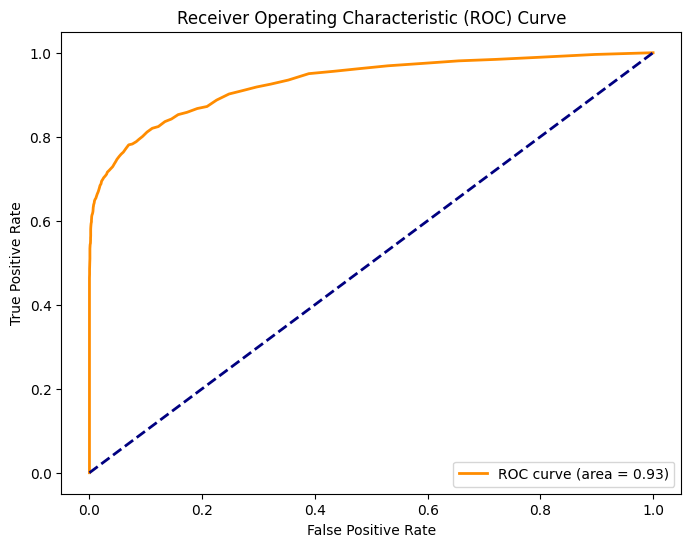

In [34]:
# Calculate ROC curve and area under the curve (AUC) for binary classification
y_probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Logistic Regression Model

In [35]:
# Instantiate Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

In [37]:
# Evaluate the model
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_report = classification_report(y_test, y_pred_lr)
lr_matrix = confusion_matrix(y_test, y_pred_lr)

print("Logistic Regression Model:")
print("Accuracy:", lr_accuracy)
print("Classification Report:\n", lr_report)
print("Confusion Matrix:\n", lr_matrix)

Logistic Regression Model:
Accuracy: 0.7983734847322388
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      5072
           1       0.71      0.15      0.25      1445

    accuracy                           0.80      6517
   macro avg       0.76      0.57      0.57      6517
weighted avg       0.78      0.80      0.74      6517

Confusion Matrix:
 [[4983   89]
 [1225  220]]


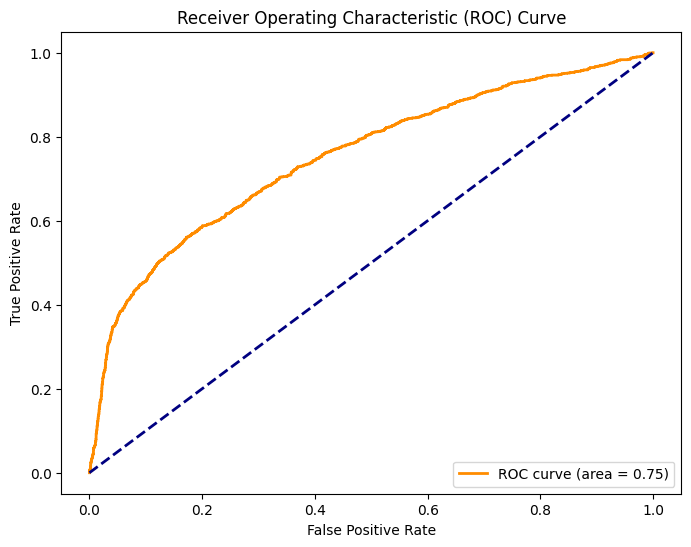

In [38]:
# Calculate ROC curve and area under the curve (AUC) for binary classification
y_probs = lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Decision Tree Model

In [39]:
# Instantiate Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

In [41]:
# Evaluate the model
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)
dt_matrix = confusion_matrix(y_test, y_pred_dt)
    
print("Decision Tree Model:")
print("Accuracy:", dt_accuracy)
print("Classification Report:\n", dt_report)
print("Confusion Matrix:\n", dt_matrix)

Decision Tree Model:
Accuracy: 0.8720270062912383
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      5072
           1       0.70      0.73      0.72      1445

    accuracy                           0.87      6517
   macro avg       0.81      0.82      0.82      6517
weighted avg       0.87      0.87      0.87      6517

Confusion Matrix:
 [[4623  449]
 [ 385 1060]]


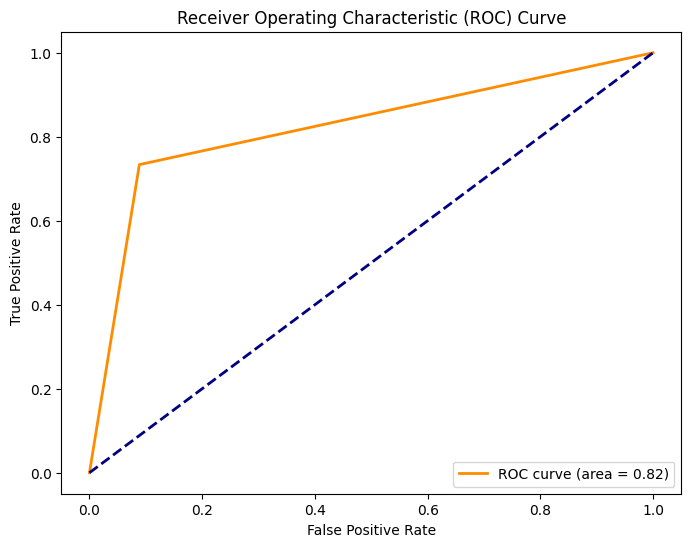

In [42]:
# Calculate ROC curve and area under the curve (AUC) for binary classification
y_probs = dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [44]:
#Compare model performances
model_accuracies = {
    'Random Forest': rf_accuracy,
    'Logistic Regression': lr_accuracy,
    'Decision Tree': dt_accuracy
}

best_model = max(model_accuracies, key=model_accuracies.get)
print(f"The best model is: {best_model} with accuracy {model_accuracies[best_model]}")

The best model is: Random Forest with accuracy 0.9146846708608255


Considering the above three supervised models, the RandomForest is best with accuracy = 91% and ROC = 0.93

### Deep learning models

### Feedforward Neural Network (FNN)

In [45]:
fnn_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
]);

In [46]:
# Compile the FNN model
fnn_model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy']);

In [47]:
# Train the FNN model
fnn_history = fnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


652/652 [==============================] - 4s 3ms/step - loss: 428.2088 - accuracy: 0.7002 - val_loss: 0.5436 - val_accuracy: 0.7767
Epoch 2/10
652/652 [==============================] - 2s 3ms/step - loss: 3.4269 - accuracy: 0.7732 - val_loss: 0.5366 - val_accuracy: 0.7765
Epoch 3/10
652/652 [==============================] - 2s 3ms/step - loss: 1.6919 - accuracy: 0.7781 - val_loss: 0.5422 - val_accuracy: 0.7763
Epoch 4/10
652/652 [==============================] - 2s 3ms/step - loss: 0.9696 - accuracy: 0.7825 - val_loss: 0.5330 - val_accuracy: 0.7763
Epoch 5/10
652/652 [==============================] - 2s 3ms/step - loss: 0.7030 - accuracy: 0.7838 - val_loss: 0.5315 - val_accuracy: 0.7763
Epoch 6/10
652/652 [==============================] - 2s 3ms/step - loss: 0.6558 - accuracy: 0.7837 - val_loss: 0.5316 - val_accuracy: 0.7763
Epoch 7/10
652/652 [==============================] - 2s 3ms/step - loss: 0.6502 - accuracy: 0.7838 - val_loss: 0.5316 - val_accuracy: 0.7763
Ep

In [48]:
# Evaluate the FNN model
fnn_accuracy = fnn_model.evaluate(X_test, y_test)[1]
print("Feedforward Neural Network Accuracy:", fnn_accuracy)

204/204 [==============================] - 0s 2ms/step - loss: 0.5292 - accuracy: 0.7783
Feedforward Neural Network Accuracy: 0.7782722115516663


### Convolution Neural Network (CNN)

In [49]:
# Reshaping the data for CNN model

X_train_cnn = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [50]:
cnn_model = keras.Sequential([
    layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [51]:
# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
# Train the CNN model
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
652/652 [==============================] - 3s 3ms/step - loss: 83.1762 - accuracy: 0.7208 - val_loss: 65.2974 - val_accuracy: 0.7873
Epoch 2/10
652/652 [==============================] - 2s 3ms/step - loss: 47.0378 - accuracy: 0.7308 - val_loss: 38.5447 - val_accuracy: 0.8109
Epoch 3/10
652/652 [==============================] - 2s 3ms/step - loss: 31.8218 - accuracy: 0.7352 - val_loss: 54.6433 - val_accuracy: 0.8030
Epoch 4/10
652/652 [==============================] - 2s 3ms/step - loss: 27.2340 - accuracy: 0.7403 - val_loss: 21.5088 - val_accuracy: 0.7443
Epoch 5/10
652/652 [==============================] - 2s 3ms/step - loss: 19.3646 - accuracy: 0.7438 - val_loss: 19.1672 - val_accuracy: 0.7848
Epoch 6/10
652/652 [==============================] - 2s 3ms/step - loss: 20.0585 - accuracy: 0.7420 - val_loss: 5.0581 - val_accuracy: 0.7234
Epoch 7/10
652/652 [==============================] - 2s 3ms/step - loss: 17.9427 - accuracy: 0.7454 - val_loss: 18.0556 - val_accuracy: 

In [53]:
# Evaluate the CNN model
cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test)[1]
print("Convolutional Neural Network Accuracy:", cnn_accuracy)

204/204 [==============================] - 0s 2ms/step - loss: 12.8810 - accuracy: 0.7832
Convolutional Neural Network Accuracy: 0.7831824421882629


### Recurrent Neural Network (RNN)

In [54]:
# Reshape data for RNN model

X_train_rnn = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_rnn = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

In [55]:
# RNN model
rnn_model = keras.Sequential([
    layers.LSTM(64, activation='relu', input_shape=(1, X_train.shape[1])),
    layers.Dense(1, activation='sigmoid')
])

In [56]:
# Compile the RNN model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the RNN model
rnn_history = rnn_model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
652/652 [==============================] - 4s 3ms/step - loss: 26.5555 - accuracy: 0.7244 - val_loss: 7.1813 - val_accuracy: 0.7036
Epoch 2/10
652/652 [==============================] - 2s 3ms/step - loss: 5.9724 - accuracy: 0.7402 - val_loss: 7.0045 - val_accuracy: 0.8105
Epoch 3/10
652/652 [==============================] - 2s 3ms/step - loss: 7.1619 - accuracy: 0.7434 - val_loss: 10.6385 - val_accuracy: 0.7861
Epoch 4/10
652/652 [==============================] - 2s 3ms/step - loss: 7.2977 - accuracy: 0.7442 - val_loss: 29.9419 - val_accuracy: 0.7775
Epoch 5/10
652/652 [==============================] - 2s 3ms/step - loss: 6.1501 - accuracy: 0.7506 - val_loss: 3.6323 - val_accuracy: 0.6390
Epoch 6/10
652/652 [==============================] - 2s 3ms/step - loss: 5.4208 - accuracy: 0.7505 - val_loss: 6.0322 - val_accuracy: 0.7840
Epoch 7/10
652/652 [==============================] - 2s 3ms/step - loss: 4.3336 - accuracy: 0.7532 - val_loss: 7.5580 - val_accuracy: 0.7970
Epo

In [57]:
# Evaluate the RNN model
rnn_accuracy = rnn_model.evaluate(X_test_rnn, y_test)[1]
print("Recurrent Neural Network Accuracy:", rnn_accuracy)

204/204 [==============================] - 1s 3ms/step - loss: 31.4169 - accuracy: 0.6767
Recurrent Neural Network Accuracy: 0.6766917109489441


In [58]:
# Compare deep learning models
model_accuracies = {
    'Feedforward Neural Network (FNN)': fnn_accuracy,
    'Convolutional Neural Network (CNN)': cnn_accuracy,
    'Recurrent Neural Network (RNN)': rnn_accuracy
}

best_dl_model = max(model_accuracies, key=model_accuracies.get)
print(f"The best-performing deep learning model is: {best_dl_model} with accuracy {model_accuracies[best_dl_model]}")

The best-performing deep learning model is: Convolutional Neural Network (CNN) with accuracy 0.7831824421882629
